# Anthitetic Variates - Estimation of $\pi$

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

We can find an approximate value for $\pi$ via Monte Carlo simulation. Consider the upper right quarter of a unit circle originated at (0,0). If we sample $(x,y)$ pairs from $U(0,1)$ and define an indicator function $f(x,y)$ which gives 1 if $x^2+y^2<=1$ and 0 otherwise, then the mean of $4*f(x,y)$ will give us $\pi$.

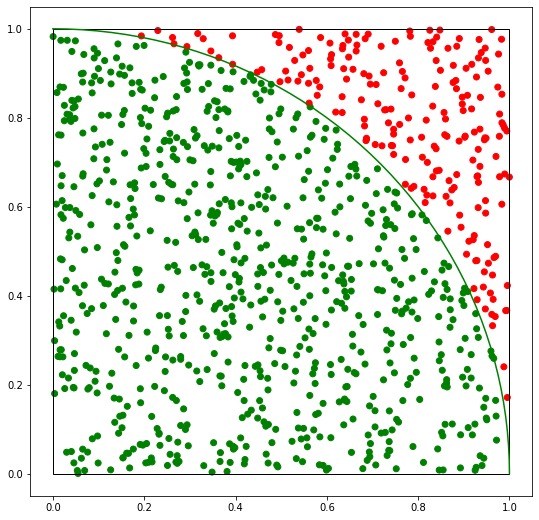

In [60]:
fig, ax = plt.subplots(figsize=(9,9))

ax.plot(np.cos(np.linspace(0,1)*np.pi/2),np.sin(np.linspace(0,1)*np.pi/2),color="green")
ax.add_patch(patches.Rectangle((0,0), 1, 1, edgecolor = 'black',fill=False))

x,y = np.random.rand(2,1000)

plt.scatter(x,y,color=["green" if x[i]**2+y[i]**2<=1 else "red" for i in range(len(x))])

plt.show()

Instead of sampling all $(x,y)$ pairs from the uniform distribution, we can also use (1-x,1-y) pairs (antithetic variate). This gives us a chance for reducing the variance while the estimation is still unbiased. It means that we can estimate the desired value with the same quality with and smaller sample size.

In [62]:
def MC_sampling_quarter_circle(sample_size,n_trial):
    indicator_function = lambda x,y: (x**2+y**2<=1)

    x,y = np.random.rand(2,n_trial,sample_size)
    pi_samples = indicator_function(x,y).mean(1)*4
    pi_samples_mean = pi_samples.mean()
    pi_samples_variance = pi_samples.var()

    print("MC Estimation")
    print(f"Estimated Pi: {pi_samples_mean:.4f}\nSimulation Variance: {pi_samples_variance:.4f}")

def AV_sampling_quarter_circle(sample_size,n_trial):
    if sample_size % 2 == 1:
        raise ValueError("The sample size should be even.")
    indicator_function = lambda x,y: (x**2+y**2<=1)

    x,y = np.random.rand(2,n_trial,sample_size//2)
    x = np.append(x,1-x,1)
    y = np.append(y,1-y,1)
    
    pi_samples = indicator_function(x,y).mean(1)*4
    pi_samples_mean = pi_samples.mean()
    pi_samples_variance = pi_samples.var()

    print("AV Estimation")
    print(f"Estimated Pi: {pi_samples_mean:.4f}\nSimulation Variance: {pi_samples_variance:.4f}")


MC_sampling_quarter_circle(10,10000)
print("")
AV_sampling_quarter_circle(10,10000)

MC Estimation
Estimated Pi: 3.1338
Simulation Variance: 0.2662

AV Estimation
Estimated Pi: 3.1421
Simulation Variance: 0.1920


However, we lose the advantage of antithetic variates if we do the same estimation with a full circle.

In [63]:
def MC_sampling_full_circle(sample_size,n_trial):
    indicator_function = lambda x,y: (x**2+y**2<=1)

    x,y = np.random.rand(2,n_trial,sample_size)*2-1
    pi_samples = indicator_function(x,y).mean(1)*4
    pi_samples_mean = pi_samples.mean()
    pi_samples_variance = pi_samples.var()

    print("MC Estimation")
    print(f"Estimated Pi: {pi_samples_mean:.4f}\nSimulation Variance: {pi_samples_variance:.4f}")

def AV_sampling_full_circle(sample_size,n_trial):
    if sample_size % 2 == 1:
        raise ValueError("The sample size should be even.")
    indicator_function = lambda x,y: (x**2+y**2<=1)

    x,y = np.random.rand(2,n_trial,sample_size//2)
    x = np.append(x,1-x,1)
    y = np.append(y,1-y,1)
    x,y = x*2-1,y*2-1
    
    pi_samples = indicator_function(x,y).mean(1)*4
    pi_samples_mean = pi_samples.mean()
    pi_samples_variance = pi_samples.var()

    print("AV Estimation")
    print(f"Estimated Pi: {pi_samples_mean:.4f}\nSimulation Variance: {pi_samples_variance:.4f}")


MC_sampling_full_circle(10,10000)
print("")
AV_sampling_full_circle(10,10000)

MC Estimation
Estimated Pi: 3.1356
Simulation Variance: 0.2684

AV Estimation
Estimated Pi: 3.1422
Simulation Variance: 0.5407


Why so? (Hint: calculate variance formula for $f(x,y)$ in both cases)